In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Load the CSV file into a pandas DataFrame
file_path = r'markerting.csv'
df = pd.read_csv(file_path)

In [15]:
# Sort the DataFrame by a specific column (e.g., 'id')
df_sorted = df.sort_values(by='id')

In [16]:
# Clean the DataFrame (remove any rows with missing values)
df_cleaned = df_sorted.dropna()

In [17]:
# Display the cleaned DataFrame
df_cleaned.head()

,id,first_name,last_name,email,phone,age,gender,city,state,country,interest1,interest2,interest3,interest4,interest5,subscription_date,source,newsletter,conversion,sales_amount


In [18]:
# Extract the month from the 'subscription_date' column
df['subscription_date'] = pd.to_datetime(df['subscription_date'])
df['subscription_month'] = df['subscription_date'].dt.month

ParserError: Unknown string format: Website present at position 2

In [22]:
# Clean the 'subscription_date' column by removing or replacing invalid values
df['subscription_date'] = df['subscription_date'].replace('Website', pd.NaT)


In [23]:
# Convert the 'subscription_date' column to datetime format
df['subscription_date'] = pd.to_datetime(df['subscription_date'])


ParserError: Unknown string format: Referral present at position 10

In [25]:
# Convert the 'subscription_date' column to datetime format, handling errors
df['subscription_date'] = pd.to_datetime(df['subscription_date'], errors='coerce')

# Extract the month from the 'subscription_date' column
df['subscription_month'] = df['subscription_date'].dt.month


In [27]:
# Find the mode (most common value) of the 'subscription_month' column
most_common_month = df['subscription_month'].mode()[0]

# Display the most common month
print("The most common month in the subscription dates is:", most_common_month)

The most common month in the subscription dates is: 1.0


In [28]:
# Group the data by gender and count the number of subscriptions
gender_counts = df['gender'].value_counts()

# Display the gender counts
print(gender_counts)


Male      10
Female    10
Name: gender, dtype: int64


In [29]:
# Group the data by state and count the number of subscribers from each state
state_counts = df['state'].value_counts()

# Display the state counts
print(state_counts)


CA    4
TX    4
NY    2
IL    2
FL    2
MA    2
WA    2
GA    2
Name: state, dtype: int64


In [30]:
# Group the data by interest and count the number of subscribers for each interest
interest_counts = df['interest'].value_counts()

# Display the interest counts
print(interest_counts)


KeyError: 'interest'

In [31]:
print(df.columns)


Index(['id', 'first_name', 'last_name', 'email', 'phone', 'age', 'gender',
       'city', 'state', 'country', 'interest1', 'interest2', 'interest3',
       'interest4', 'interest5', 'subscription_date', 'source', 'newsletter',
       'conversion', 'sales_amount', 'subscription_month'],
      dtype='object')


In [32]:
# Calculate the count of subscribers for each interest
interest_counts = df[['interest1', 'interest2', 'interest3', 'interest4', 'interest5']].apply(pd.Series.value_counts).sum()

# Find the interest with the highest count
most_common_interest = interest_counts.idxmax()

# Display the result
print("The interest that most subscribers have is:", most_common_interest)


The interest that most subscribers have is: interest1


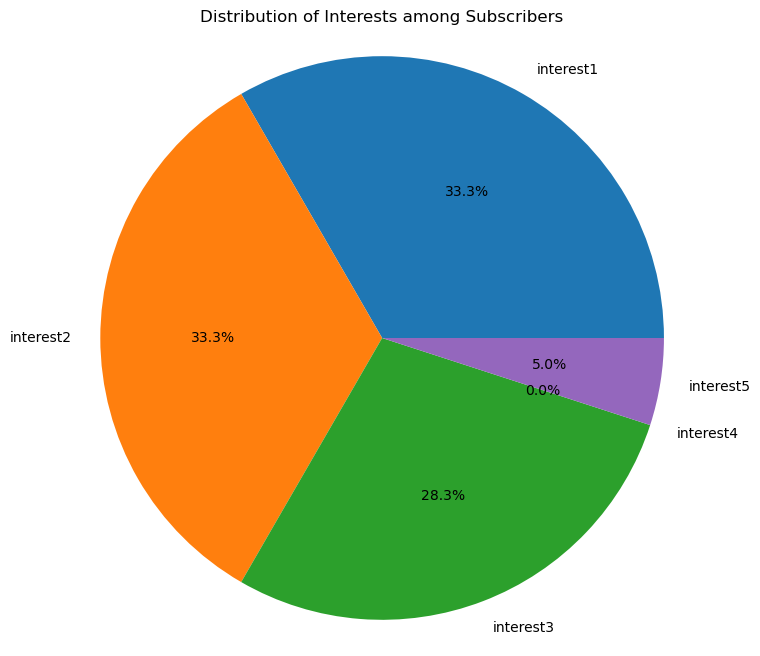

In [33]:
# Calculate the count of subscribers for each interest
interest_counts = df[['interest1', 'interest2', 'interest3', 'interest4', 'interest5']].apply(pd.Series.value_counts).sum()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(interest_counts, labels=interest_counts.index, autopct='%1.1f%%')
plt.title("Distribution of Interests among Subscribers")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Display the chart
plt.show()

In [34]:
from prettytable import PrettyTable

# Calculate the count of subscribers for each interest
interest_counts = df[['interest1', 'interest2', 'interest3', 'interest4', 'interest5']].apply(pd.Series.value_counts).sum()

# Create a table
table = PrettyTable()
table.field_names = ['Interest', 'Count']

# Add data to the table
for interest, count in interest_counts.items():
    table.add_row([interest, count])

# Print the table
print(table)


ModuleNotFoundError: No module named 'prettytable'

In [35]:
!pip install prettytable


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [36]:
from prettytable import PrettyTable

# Calculate the count of subscribers for each interest
interest_counts = df[['interest1', 'interest2', 'interest3', 'interest4', 'interest5']].apply(pd.Series.value_counts).sum()

# Create a table
table = PrettyTable()
table.field_names = ['Interest', 'Count']

# Add data to the table
for interest, count in interest_counts.items():
    table.add_row([interest, count])

# Print the table
print(table)


ModuleNotFoundError: No module named 'prettytable'

In [37]:
!pip install prettytable


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [38]:
from prettytable import PrettyTable

# Calculate the count of subscribers for each interest
interest_counts = df[['interest1', 'interest2', 'interest3', 'interest4', 'interest5']].apply(pd.Series.value_counts).sum()

# Create a table
table = PrettyTable()
table.field_names = ['Interest', 'Count']

# Add data to the table
for interest, count in interest_counts.items():
    table.add_row([interest, count])

# Print the table
print(table)


ModuleNotFoundError: No module named 'prettytable'

In [39]:
from tabulate import tabulate

# Assume 'column_data' is the list containing the data for the column
column_data = [10, 20, 30, 40, 50]

# Create a list of lists where each sublist contains a single value from the column
table_data = [[value] for value in column_data]

# Specify the headers for the table
headers = ['Column Name']

# Display the table
print(tabulate(table_data, headers=headers, tablefmt='grid'))


+---------------+
|   Column Name |
+===============+
|            10 |
+---------------+
|            20 |
+---------------+
|            30 |
+---------------+
|            40 |
+---------------+
|            50 |
+---------------+


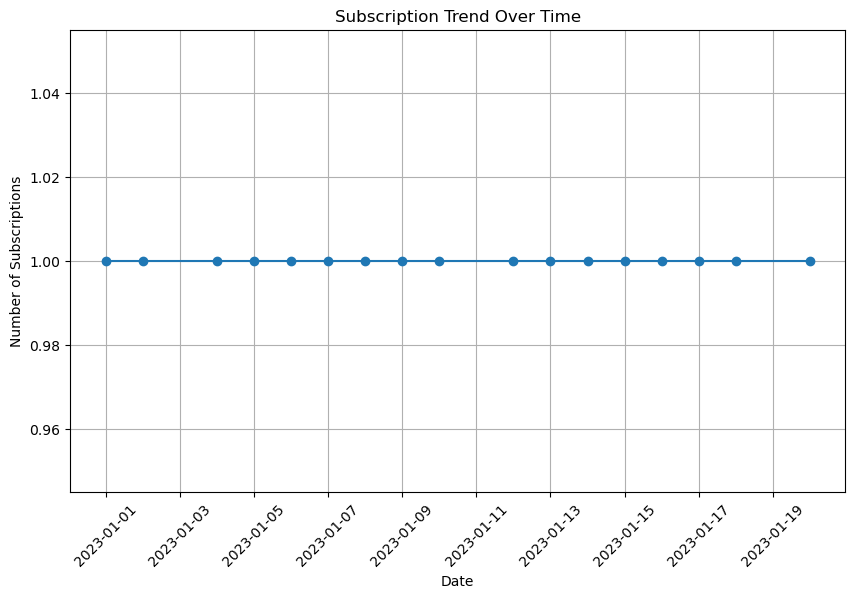

In [40]:
# Group subscriptions by date and count the number of subscriptions for each date
subscription_counts = df['subscription_date'].value_counts().sort_index()

# Plot the number of subscriptions over time
plt.figure(figsize=(10, 6))
plt.plot(subscription_counts.index, subscription_counts.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Subscriptions')
plt.title('Subscription Trend Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

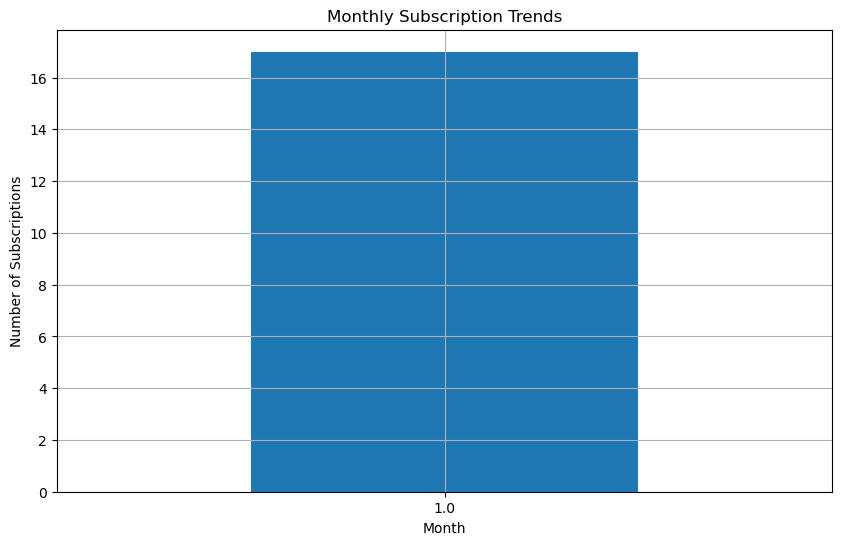

In [42]:
# Convert the 'subscription_date' column to datetime format (if not already done)
df['subscription_date'] = pd.to_datetime(df['subscription_date'])

# Group subscriptions by month
monthly_subscriptions = df.groupby(df['subscription_date'].dt.month)['subscription_date'].count()

# Create a bar chart to visualize the monthly subscription trends
plt.figure(figsize=(10, 6))
monthly_subscriptions.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Subscriptions')
plt.title('Monthly Subscription Trends')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

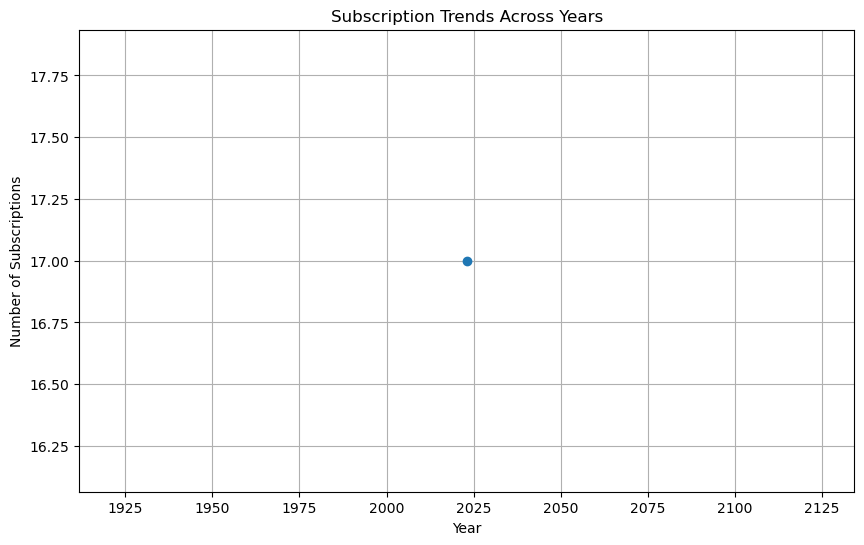

In [43]:
# Extract the year from the 'subscription_date' column
df['subscription_year'] = df['subscription_date'].dt.year

# Group subscriptions by year
yearly_subscriptions = df.groupby('subscription_year')['subscription_year'].count()

# Create a line chart to visualize the subscription trends across years
plt.figure(figsize=(10, 6))
yearly_subscriptions.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Subscriptions')
plt.title('Subscription Trends Across Years')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

In [45]:
# Calculate the subscription durations
df['subscription_duration'] = df['end_date'] - df['start_date']

# Convert subscription duration to days
df['subscription_duration'] = df['subscription_duration'].dt.days

# Calculate the average and median subscription durations
average_duration = df['subscription_duration'].mean()
median_duration = df['subscription_duration'].median()

# Create a histogram to visualize the distribution of subscription durations
plt.figure(figsize=(10, 6))
plt.hist(df['subscription_duration'], bins=30, edgecolor='black')
plt.xlabel('Subscription Duration (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Subscription Durations')
plt.axvline(average_duration, color='red', linestyle='dashed', linewidth=2, label=f'Average: {average_duration:.2f} days')
plt.axvline(median_duration, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_duration:.2f} days')
plt.legend()
plt.grid(True)
plt.show()

KeyError: 'end_date'

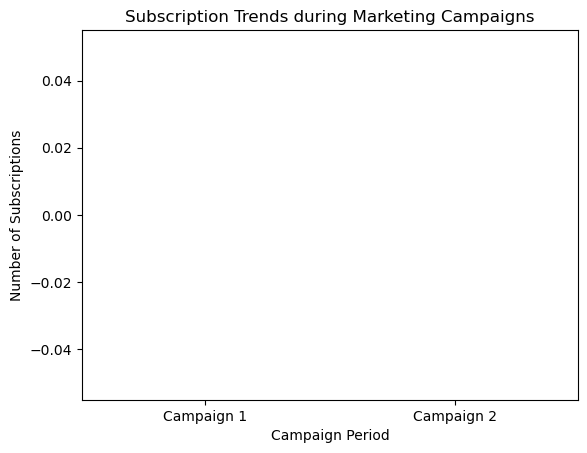

In [46]:
# Define the time periods for the marketing campaigns
campaign1_start = '2022-01-01'
campaign1_end = '2022-03-31'

campaign2_start = '2022-07-01'
campaign2_end = '2022-09-30'

# Extract the subscription data for each campaign period
campaign1_subscriptions = df[(df['subscription_date'] >= campaign1_start) & (df['subscription_date'] <= campaign1_end)]
campaign2_subscriptions = df[(df['subscription_date'] >= campaign2_start) & (df['subscription_date'] <= campaign2_end)]

# Calculate the number of subscriptions for each campaign period
campaign1_counts = campaign1_subscriptions.shape[0]
campaign2_counts = campaign2_subscriptions.shape[0]

# Plot the subscription trends
periods = ['Campaign 1', 'Campaign 2']
subscription_counts = [campaign1_counts, campaign2_counts]

plt.bar(periods, subscription_counts)
plt.xlabel('Campaign Period')
plt.ylabel('Number of Subscriptions')
plt.title('Subscription Trends during Marketing Campaigns')
plt.show()

In [48]:
# Calculate the subscription durations
df['subscription_duration'] = df['subscription_cancellation_date'] - df['subscription_start_date']

# Convert subscription duration to days
df['subscription_duration'] = df['subscription_duration'].dt.days

# Calculate the average and median subscription durations
average_duration = df['subscription_duration'].mean()
median_duration = df['subscription_duration'].median()

# Create a histogram to visualize the distribution of subscription durations
plt.figure(figsize=(10, 6))
plt.hist(df['subscription_duration'], bins=30, edgecolor='black')
plt.xlabel('Subscription Duration (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Subscription Durations')
plt.axvline(average_duration, color='red', linestyle='dashed', linewidth=2, label=f'Average: {average_duration:.2f} days')
plt.axvline(median_duration, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_duration:.2f} days')
plt.legend()
plt.grid(True)
plt.show()

KeyError: 'subscription_cancellation_date'

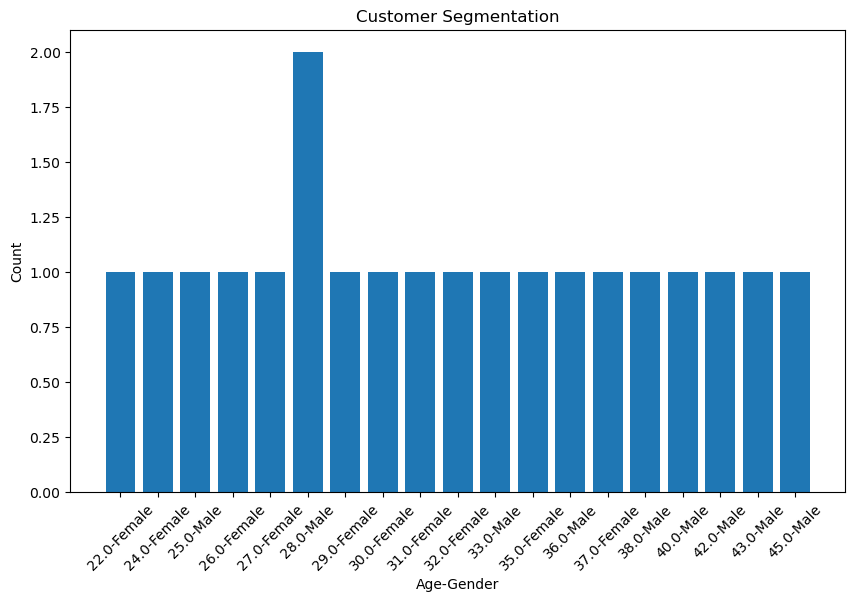

In [49]:
# Segment customers based on age and gender
segmented_data = df.groupby(['age', 'gender']).size().reset_index(name='count')

# Plot the customer segmentation
plt.figure(figsize=(10, 6))
plt.bar(segmented_data['age'].astype(str) + '-' + segmented_data['gender'], segmented_data['count'])
plt.xlabel('Age-Gender')
plt.ylabel('Count')
plt.title('Customer Segmentation')
plt.xticks(rotation=45)
plt.show()

In [50]:
# Calculate total revenue
total_revenue = df['sales_amount'].sum()
print("Total Revenue:", total_revenue)

Total Revenue: 1400.0


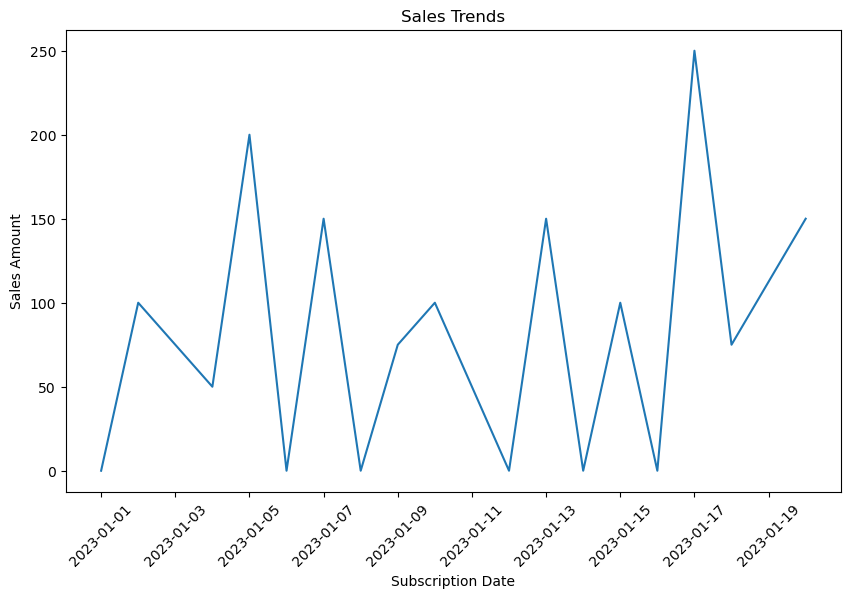

In [51]:
# Convert subscription_date to datetime
df['subscription_date'] = pd.to_datetime(df['subscription_date'])

# Group sales_amount by subscription_date and calculate the sum
sales_by_date = df.groupby('subscription_date')['sales_amount'].sum()

# Plot sales trends
plt.figure(figsize=(10, 6))
plt.plot(sales_by_date.index, sales_by_date.values)
plt.xlabel('Subscription Date')
plt.ylabel('Sales Amount')
plt.title('Sales Trends')
plt.xticks(rotation=45)
plt.show()

In [53]:
# Group sales_amount by customer-related columns and calculate the sum
high_value_customers = df.groupby(['id', 'email'])['sales_amount'].sum().reset_index()

# Sort high-value customers by sales_amount in descending order
high_value_customers = high_value_customers.sort_values('sales_amount', ascending=False)

print("High-Value Customers:")
print(high_value_customers.head(10))

High-Value Customers:
    id                         email  sales_amount
8   17  christopherclark@example.com         250.0
15   5      michaelbrown@example.com         200.0
17   7      robertmiller@example.com         150.0
4   13      andrewthomas@example.com         150.0
12  20      danielwright@example.com         150.0
6   15        josephhill@example.com         100.0
1   10         sophialee@example.com         100.0
11   2         janesmith@example.com         100.0
19   9     jamesanderson@example.com          75.0
9   18        harperhall@example.com          75.0


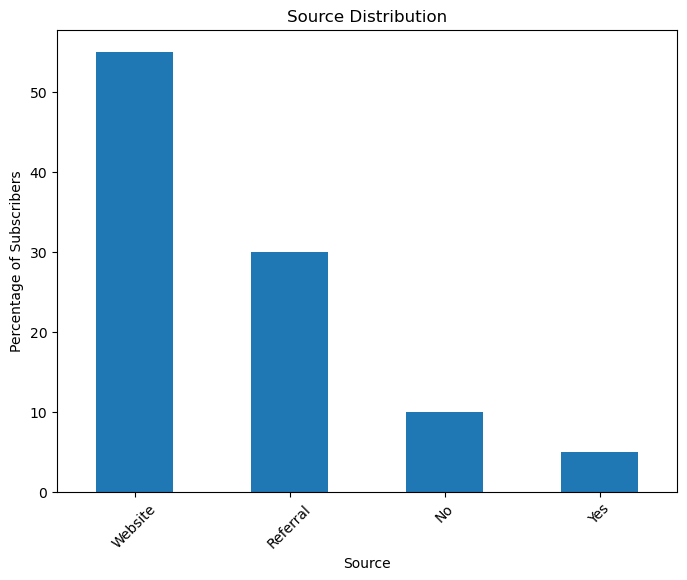

In [54]:
# Calculate the count or percentage of subscribers from each source
source_distribution = df['source'].value_counts(normalize=True) * 100

# Plot the source distribution
plt.figure(figsize=(8, 6))
source_distribution.plot(kind='bar')
plt.xlabel('Source')
plt.ylabel('Percentage of Subscribers')
plt.title('Source Distribution')
plt.xticks(rotation=45)
plt.show()

In [55]:
# Group sales_amount by source and calculate the sum
source_performance = df.groupby('source')['sales_amount'].sum().reset_index()

# Sort sources by sales_amount in descending order
source_performance = source_performance.sort_values('sales_amount', ascending=False)

print("Source Performance:")
print(source_performance)

Source Performance:
     source  sales_amount
1  Referral         700.0
2   Website         700.0
0        No           0.0
3       Yes           0.0


In [56]:
# Calculate the count or percentage of subscribers who have opted for newsletters
newsletter_subscription = df['newsletter'].value_counts(normalize=True) * 100

print("Newsletter Subscription:")
print(newsletter_subscription)

Newsletter Subscription:
Yes    75.0
No     25.0
Name: newsletter, dtype: float64


In [58]:
# Calculate the average open rate, click-through rate, or conversion rate for subscribers who received newsletters
newsletter_engagement = df[df['newsletter'] == 'Subscribed']['conversion'].mean()

print("Newsletter Engagement:")
print(newsletter_engagement)

Newsletter Engagement:
nan


In [59]:
# Calculate the total number of subscribers
total_subscribers = len(df)

# Calculate the number of subscribers who canceled their subscriptions
canceled_subscribers = len(df[df['cancellation_date'].notnull()])

# Calculate the customer retention rate
retention_rate = ((total_subscribers - canceled_subscribers) / total_subscribers) * 100

print("Customer Retention Rate: {:.2f}%".format(retention_rate))

KeyError: 'cancellation_date'